In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import matplotlib_inline
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import r2_score
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import VotingRegressor,VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE,SMOTEN,SMOTENC,SVMSMOTE

In [4]:
import os
import scipy as stats
%matplotlib inline
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('Avacado',sep='\t')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [6]:
# removing data
df.drop('Unnamed: 0',axis=1,inplace=True)


In [7]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [8]:
df.tail()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,04-02-2018,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,28-01-2018,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,21-01-2018,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,14-01-2018,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,07-01-2018,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


# Exploratory Data Analysis (EDA)

In [9]:
df.shape

(18249, 13)

In [10]:
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

there are 3 features have object data type and remaining 10 features have numeric data types
The Date column showing object data type which means python is not able to understand the type of Date. So let's do feature engineering to split Date into Month and Day. Since year column is already been there so no need to separate it.

In [11]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [12]:
df.nunique()

Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [14]:
df['Date']=pd.to_datetime(df['Date'])

In [15]:
# Now Seperate date and month
df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df.drop("Date",axis=1,inplace=True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [16]:
# Now let us check any duplicate value present in our data
df.drop_duplicates(inplace=True)
df.shape

(18249, 14)

seems that no duplicates are there

In [17]:
df.describe(include='all')

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249,18249.000000,18249,18249.000000,18249.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,54,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,Albany,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9126,NaN,338,NaN,NaN
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,NaN,2016.147899,NaN,6.372842,15.466984
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,NaN,0.939938,NaN,3.525034,8.984552
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,NaN,2015.000000,NaN,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,NaN,2015.000000,NaN,3.000000,7.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,NaN,2016.000000,NaN,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,NaN,2017.000000,NaN,10.000000,23.000000


OBSERVATION
*It is observed that columns like Large Bags and XLarge Bags may contain outliers since there is a huge difference between 75% and max and their respective means and 50% also are significantly different.

*A higher Std than mean in Total Bags, Small Bags and, XLarge Bags columns indicates skewness.

In [18]:
df['XLarge Bags'].value_counts()

0.00       12048
3.33          29
6.67          16
1.11          15
5.00          12
           ...  
3018.05        1
2739.44        1
9301.67        1
8640.00        1
24.18          1
Name: XLarge Bags, Length: 5588, dtype: int64

In [19]:
# Now seperating numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day']


In [20]:
# seprerating categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['type', 'region']


In [21]:
df.year.unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [22]:
df.type.unique()

array(['conventional', 'organic'], dtype=object)

<AxesSubplot:xlabel='type', ylabel='count'>

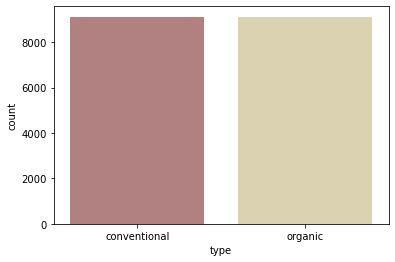

In [23]:
sns.countplot(x="type", data=df, palette = 'pink')

We can observe both conventional and organic types of avocado are equal in counts. Which means half of the avocado products were not natuaral amd inorganic.But both types have equal demand in market

<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

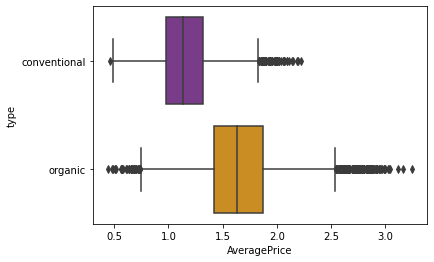

In [24]:
sns.boxplot(y="type", x="AveragePrice", data=df, palette = 'CMRmap')

Type of Avocado vs Average Price

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

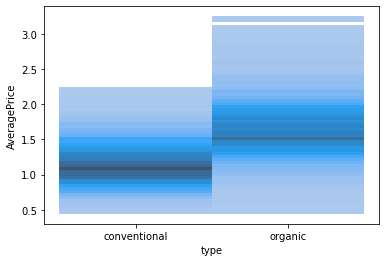

In [25]:
sns.histplot(y="AveragePrice", x="type", data=df, palette = 'indigo')

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64


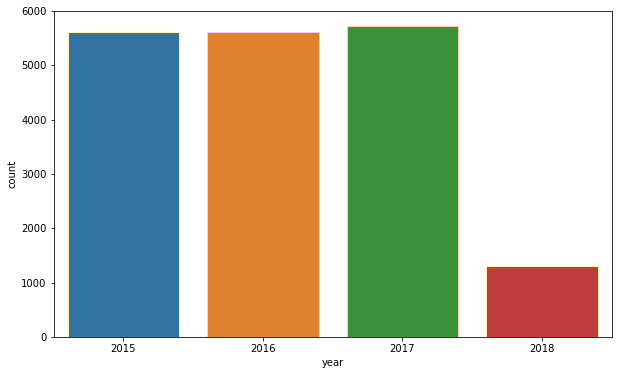

In [26]:
#Visualize the count of year
print(df["year"].value_counts())
plt.figure(figsize=(10,6))

sns.countplot(df["year"],edgecolor=sns.color_palette("Pastel2_r", 3))
plt.show()

we already mentioned in the problem statement , this data is till May 2018, for the year 2018 the data is very less, and for remaining years the consumption is almost equal

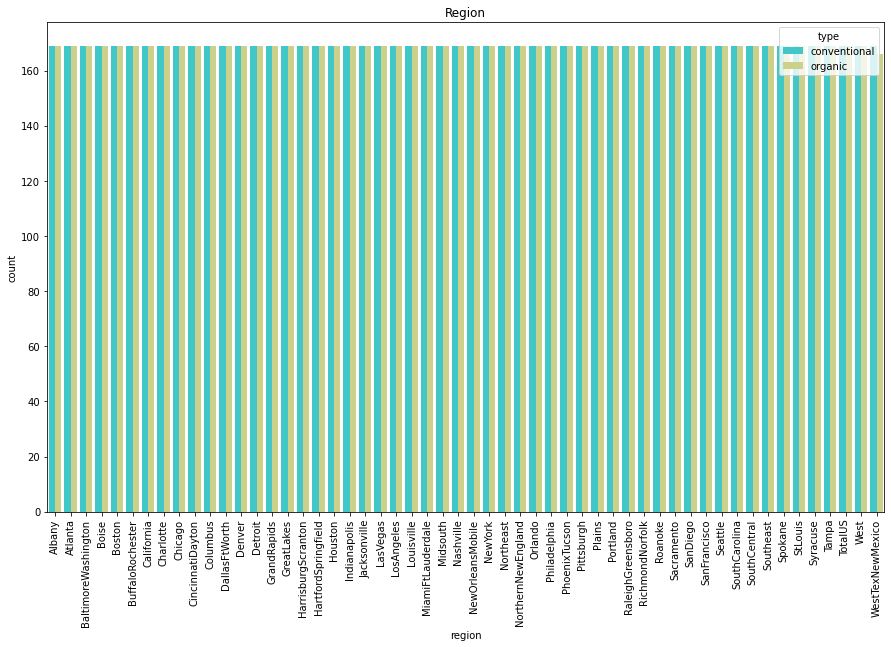

In [27]:
#Visualize the count of Region
plt.figure(figsize=(15,9))
sns.countplot(df["region"],palette="rainbow",hue=df['type'])
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

<Figure size 1800x1800 with 0 Axes>

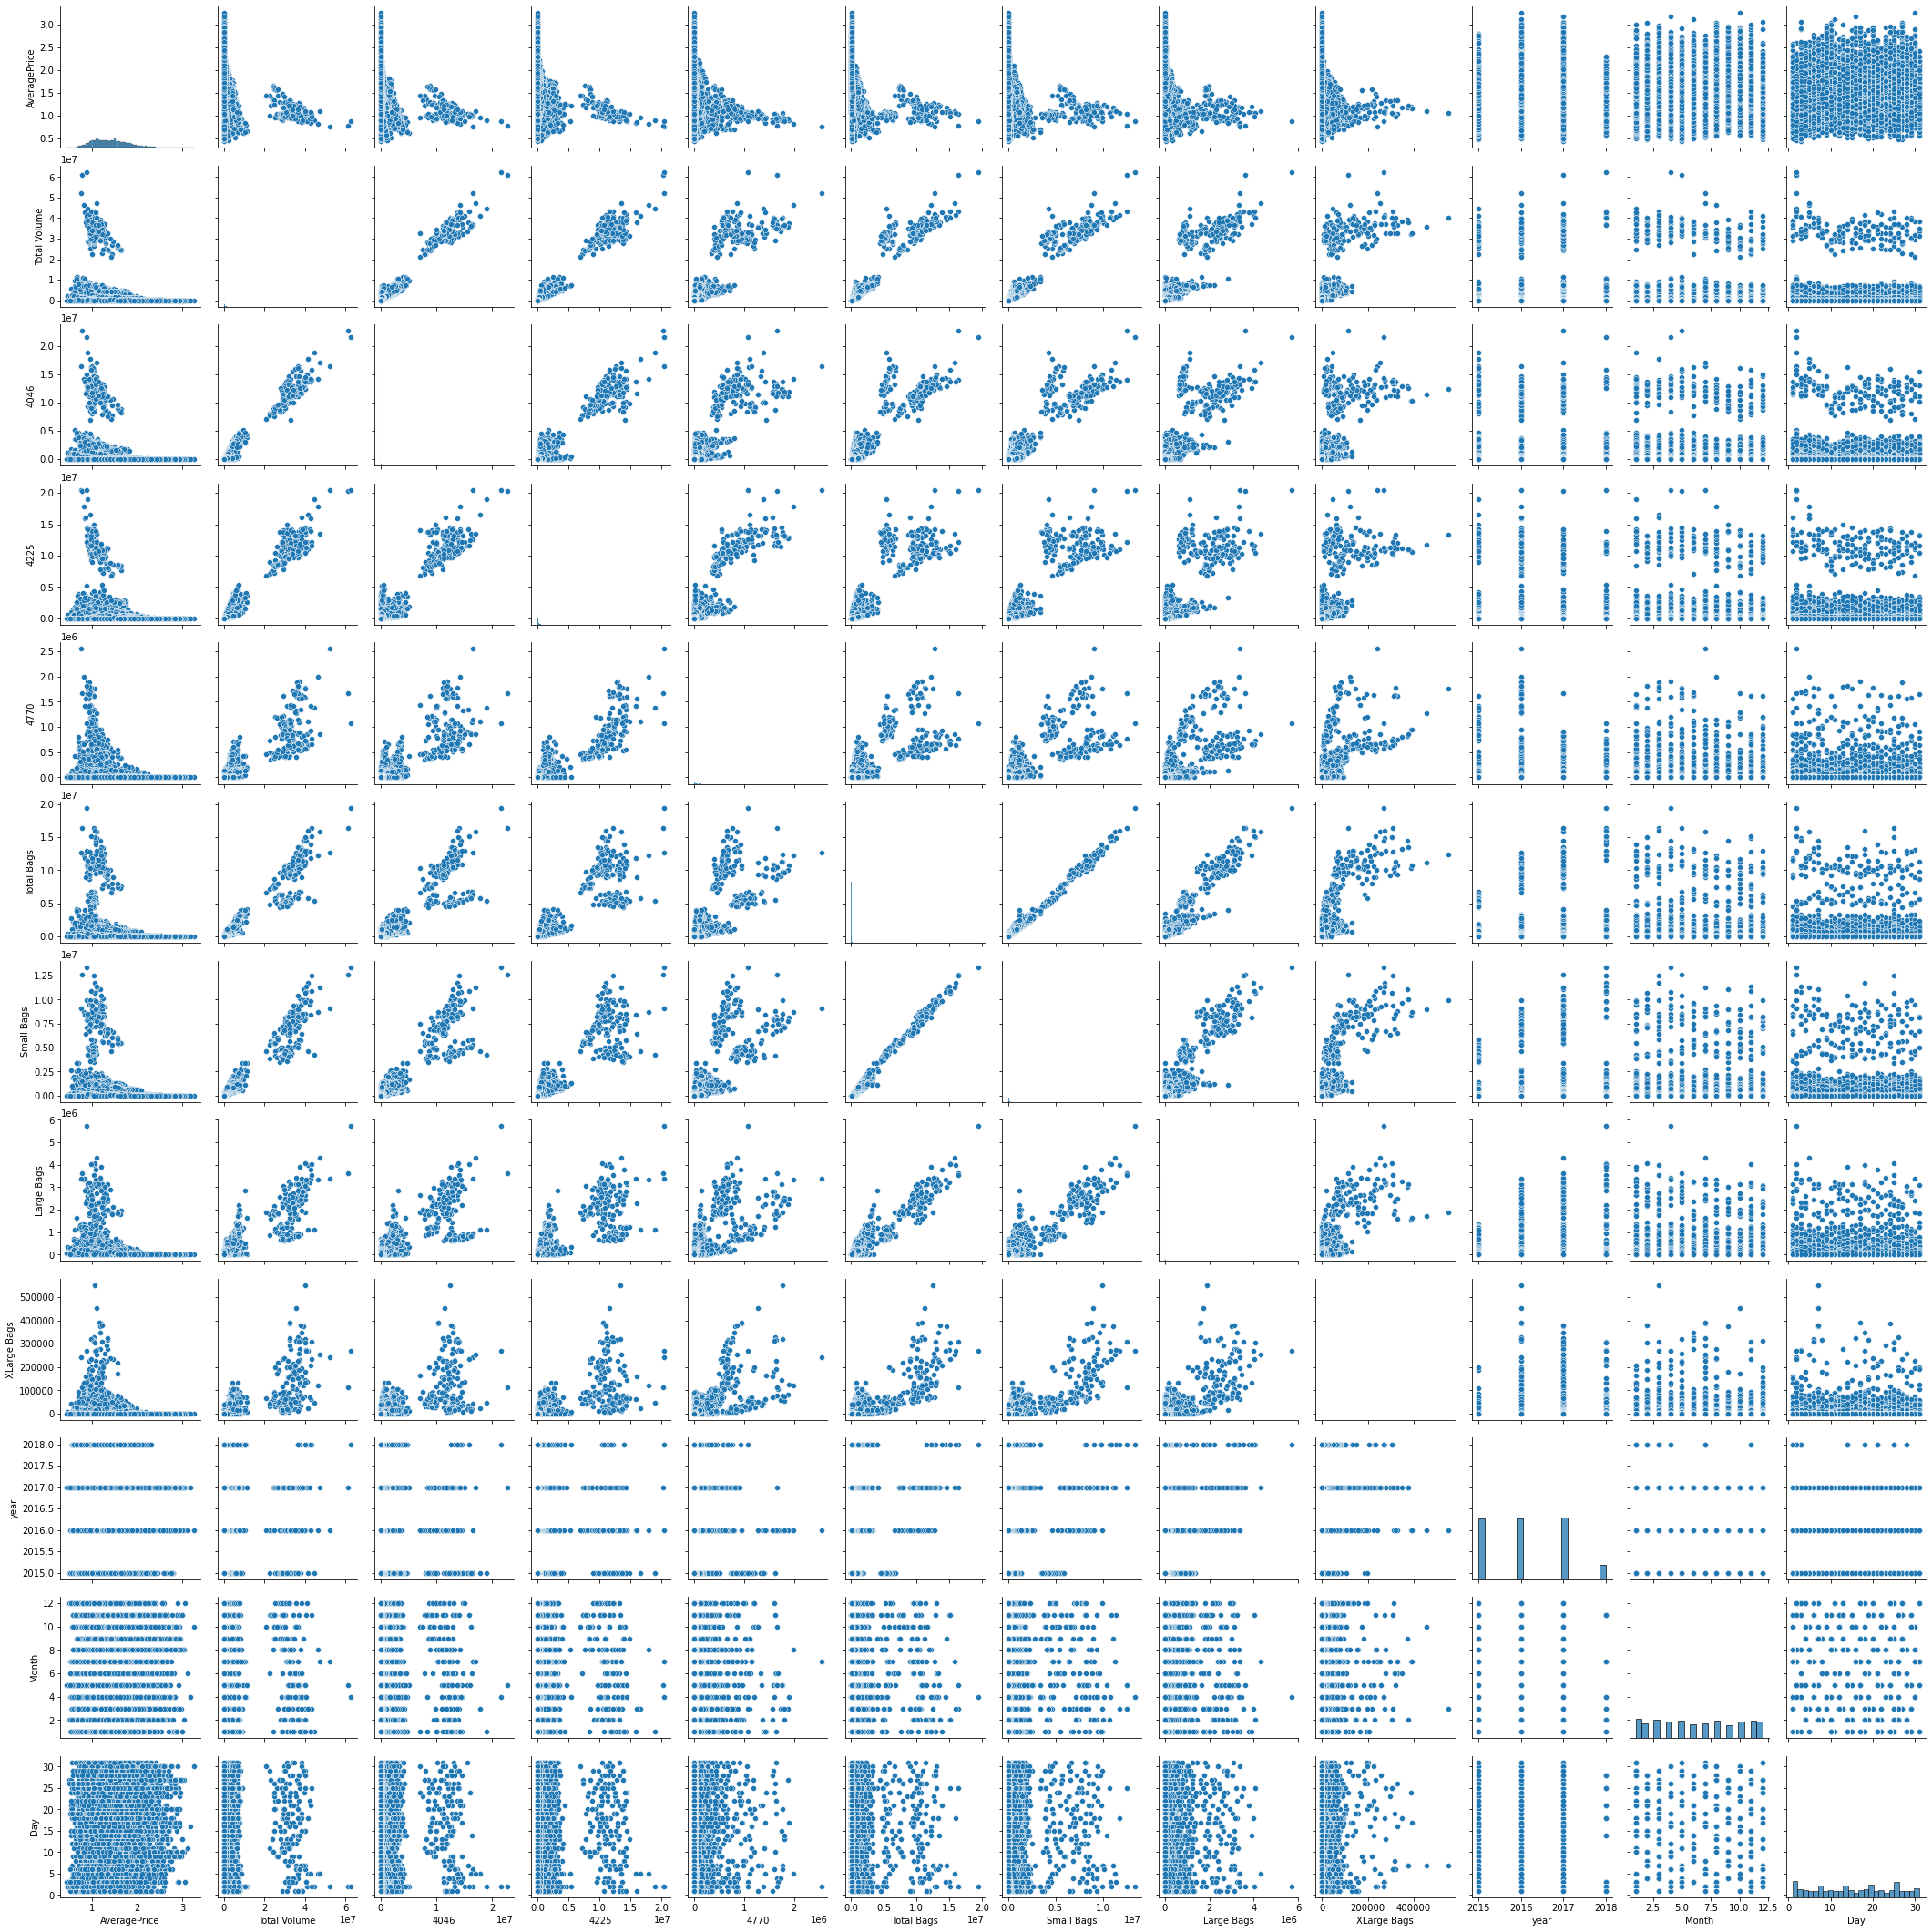

In [28]:
plt.figure(figsize=(25,25))
sns.pairplot(df)
plt.show()

This figures shows us that there is a strong relation between total bags and small bags.

From this figure we can assume that there is high multicolinearity

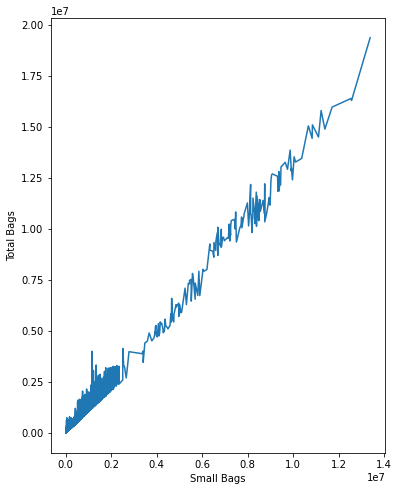

In [29]:
#let us plot pairwise where we feel of high relation:

plt.figure(figsize=(6,8))
sns.lineplot('Small Bags','Total Bags',data=df)
plt.show()

there is high relation between these two, This means most of the customers were using small bags.

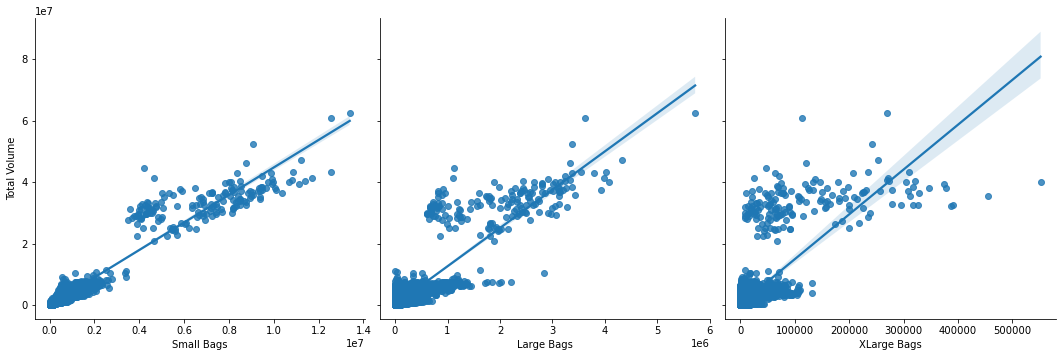

In [30]:
sns.pairplot(df, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Volume', size=5, aspect=1, kind='reg')

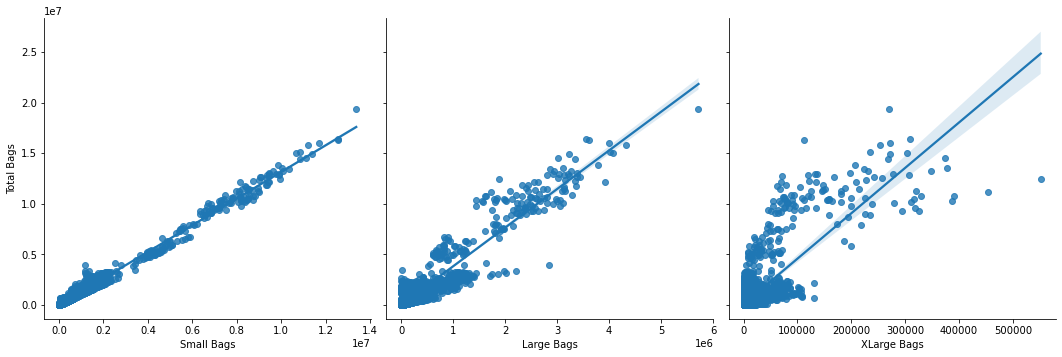

In [31]:
sns.pairplot(df, x_vars=['Small Bags', 'Large Bags', 'XLarge Bags'], y_vars='Total Bags', size=5, aspect=1, kind='reg')

There is a strong co-relation between TotalVolume Vs Small and TotalBags Vs SmallBags.
We can say weak co-relation between TotalVolume Vs XLarge and TotalBags Vs XLargeBags.
Large and LargeBags comes in the middle.

Region Vs Year distribution
From the graph we can say that in year 2017 the HartfordSpringfield region being the maximum consumption of Avocado.

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

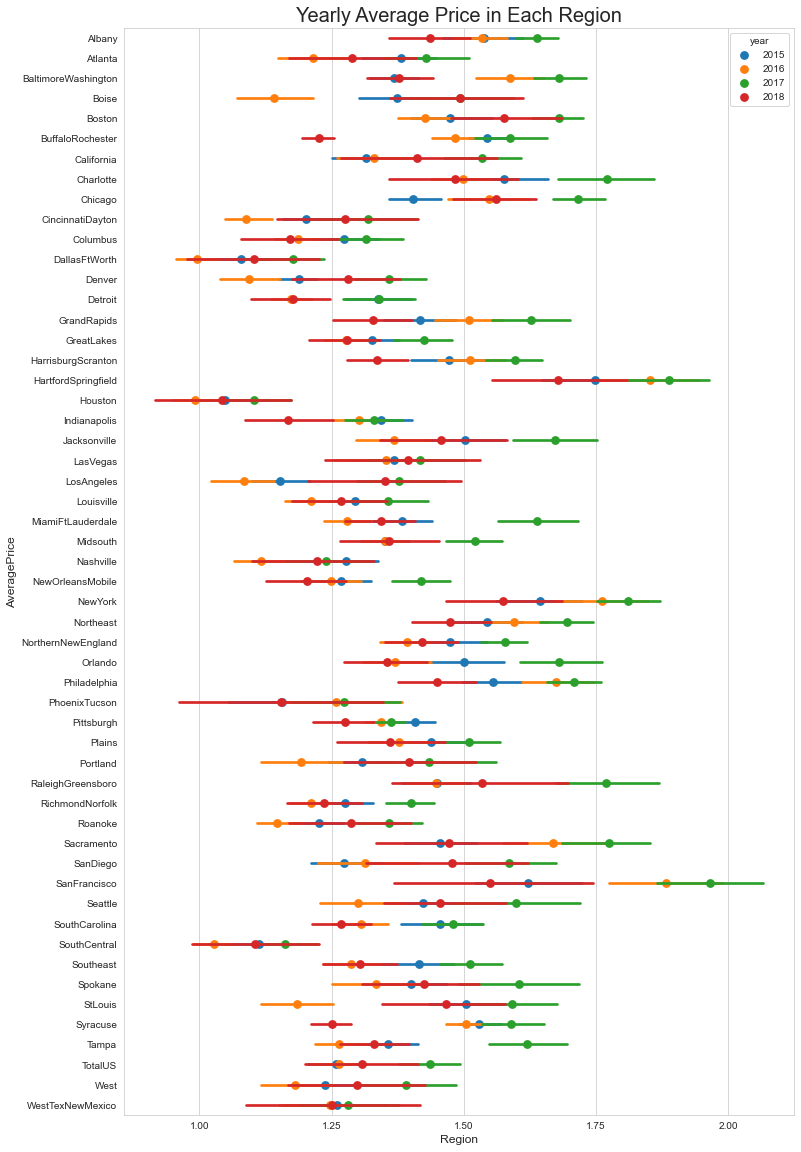

In [32]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=df, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

From the graph we can say that Organic Type Avocado prices are high in HartfordSpringfield and Sanfrancisco region.
For Conventional Type we have an average price < 1.50$.

Relationship between year and Total volume:

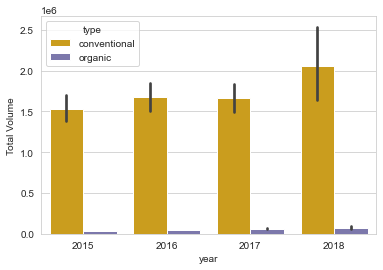

In [33]:
plt.figure(figsize=(6,4))
sns.barplot(x='year',y='Total Volume',hue="type",data=df,palette='Dark2_r')
plt.show()

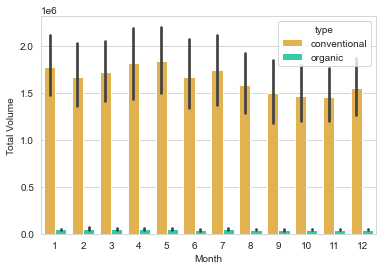

In [34]:
plt.figure(figsize=(6,4))
sns.barplot(x='Month',y='Total Volume',hue="type",data=df,palette="turbo_r")
plt.show()

Organic avocados are more expensive. This is obvious because they are more expensive to grow and we all like natural products and are willing to pay a higher price for them. But it's likely that the price of avocado doesn't just depend on the type. Let's look at the price of avocado in different regions in different years. Let's start with organic avocados.

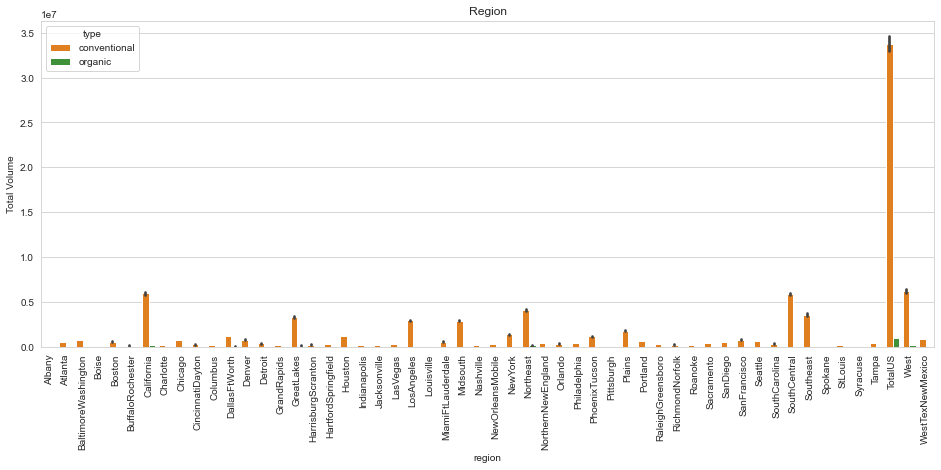

In [35]:
plt.figure(figsize=(16,6))
sns.barplot(df["region"],df['Total Volume'],palette='Paired_r',hue=df['type'])
plt.title("Region")
plt.xticks(rotation=90)
plt.show()

Below mentioned region are where Consumption is very high West
California

SouthCentral

Northeast

Southeast

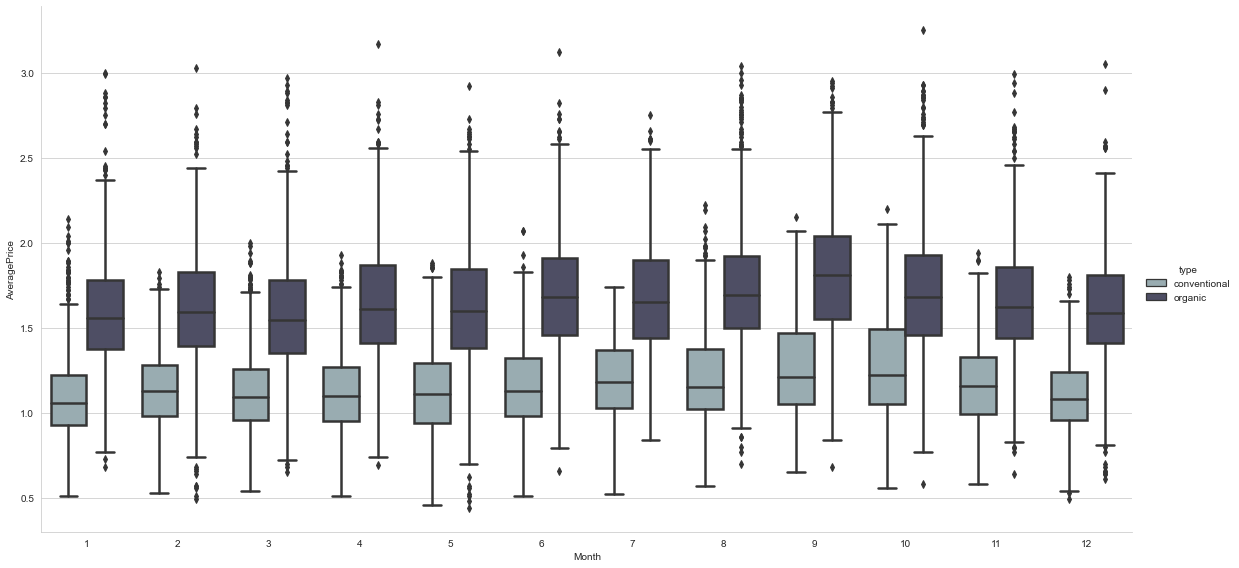

In [36]:
#Relation between month and Average PRice
sns.catplot(x="Month", y="AveragePrice", hue="type", 
            kind="box", data=df, height=8, linewidth=2.5, aspect=2,palette="bone_r");

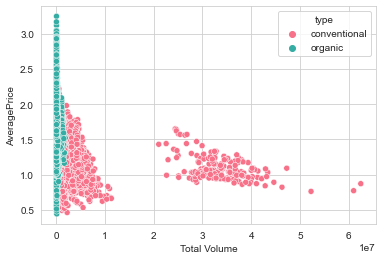

In [37]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Total Volume",y="AveragePrice",hue="type",data=df,palette="husl")
plt.show()

Checking for outliers:

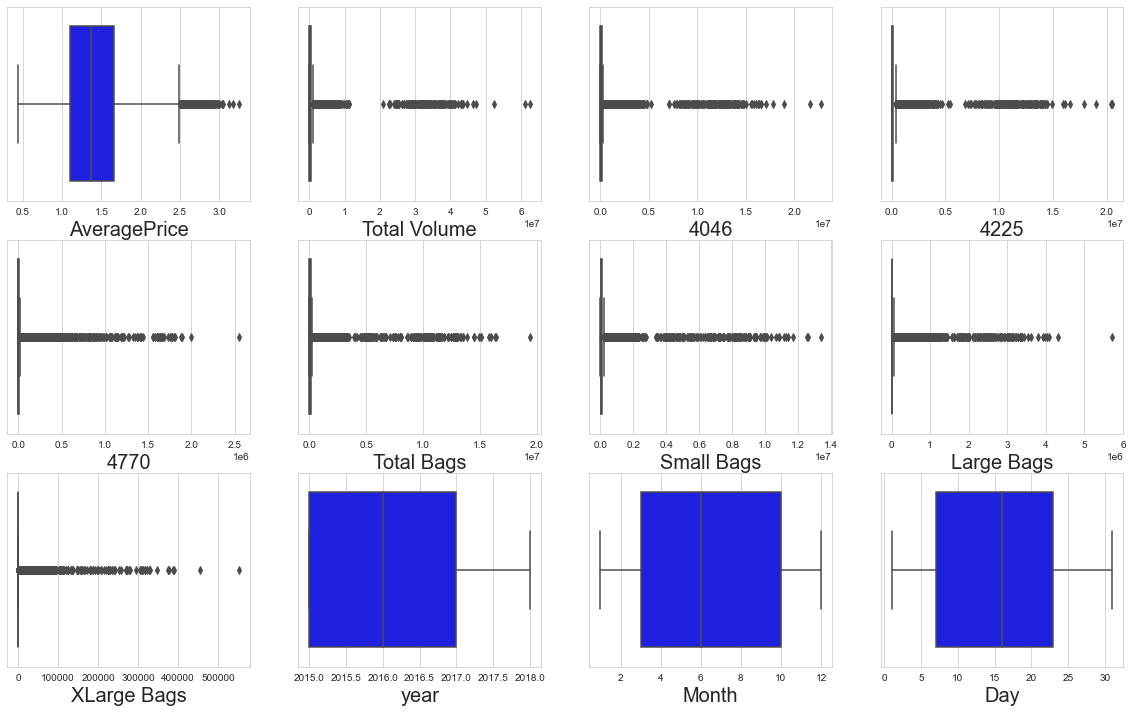

In [38]:
numerical_col=['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year','Month', 'Day']
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

Above plotting shows The outliers present in all the columns except year, Month and Day. Let's remove the outliers using Zscore method. Even AveragePrice has outliers, as its our target variable we will not remove outliers from it.

In [39]:
# Features containing outliers
feature_cols = df[['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']]
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(feature_cols))

z

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...
18244,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
18245,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
18246,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
18247,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


In [40]:
# Creating new dataframe by removing zscore
new_df = df[(z<3).all(axis=1)] 
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [41]:
df.shape

(18249, 14)

In [42]:
new_df.shape

(17782, 14)

In [43]:
# % of data loss 
round(((18249-17782)/18249*100),2)

2.56

Data loss of only 2.56 % which is affordable

In [44]:
# 1st quantile
Q1=feature_cols.quantile(0.25)

# 3rd quantile
Q3=feature_cols.quantile(0.75)

# IQR
IQR=Q3 - Q1
new_df2=df[~((df <(Q1-1.5 * IQR))|(df >(Q3 + 1.5 * IQR))).any(axis=1)]
new_df2.shape

(11747, 14)

In [45]:
# %of data loss
round(((18249-11747)/18249*100),2)

35.63

About 35.63% of data is lost, so we cannot use this method , So we will proceed with zscore method which is affordable for us

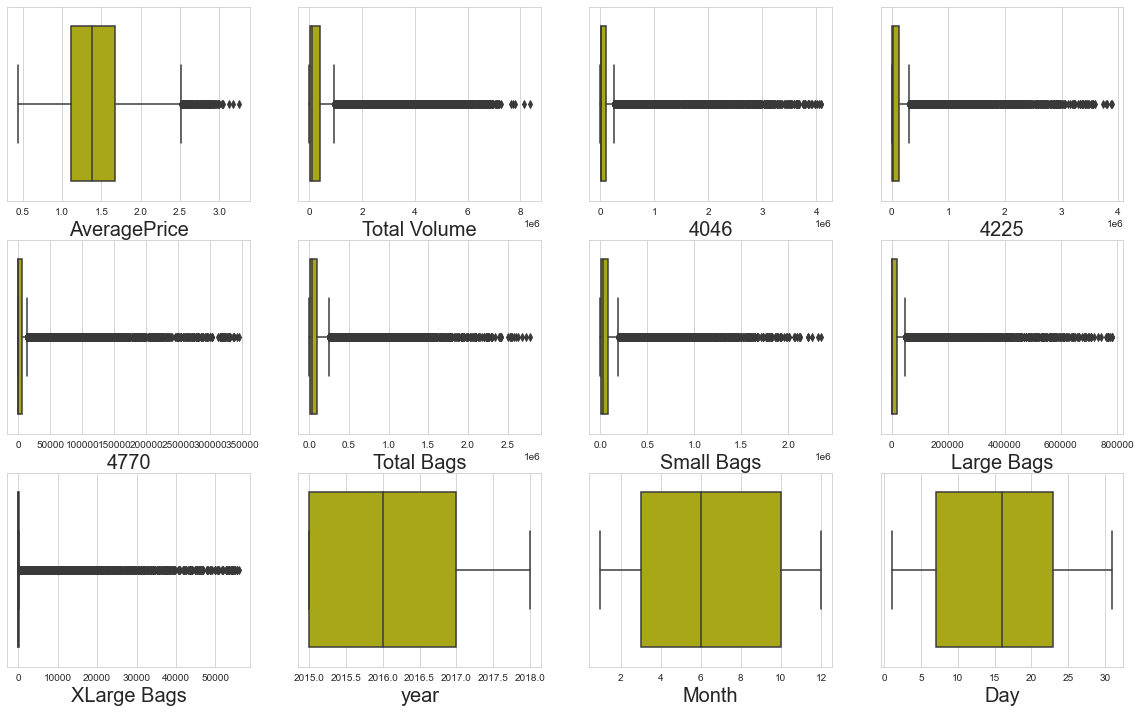

In [46]:
# again plotting to check the status of outlier amount:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=18:
        ax = plt.subplot(6,4,plotnumber)
        sns.boxplot(new_df[column],color='y')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

The amount of outliers are reduced, now we will proceed remove skewness

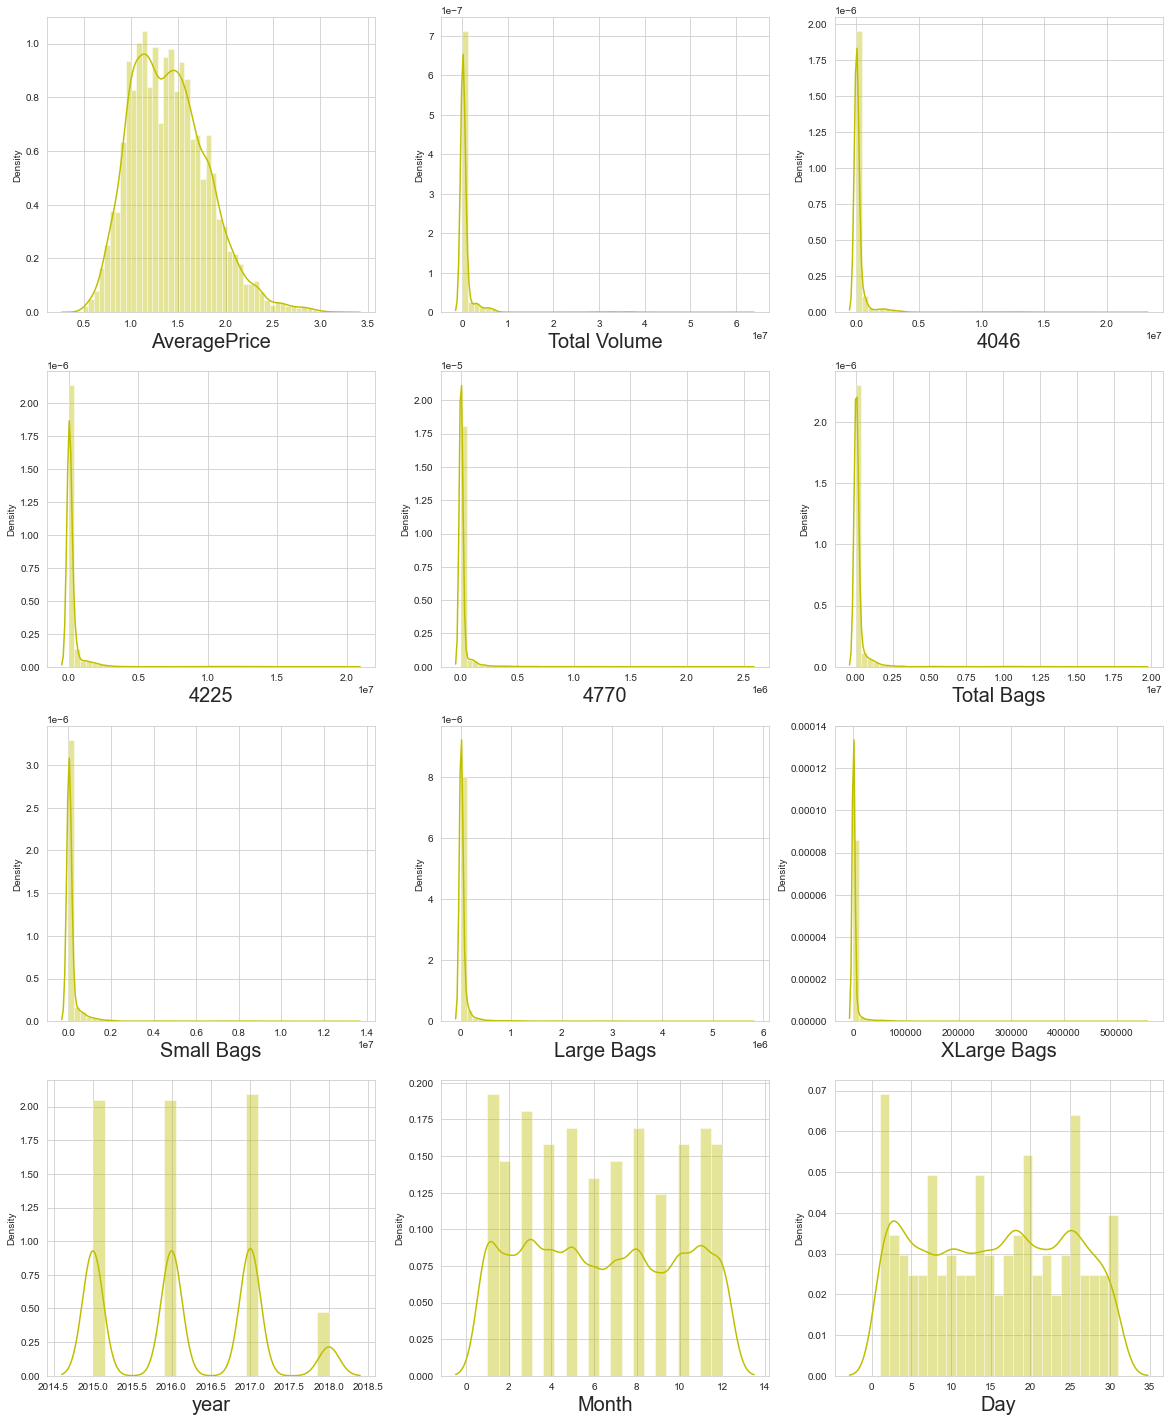

In [47]:
# Checking how the data has been distriubted in each column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(df[column],color='y')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

We can notice skewness in almost all columns except year, month and Day.

In [48]:
new_df.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
year            0.220792
Month           0.042069
Day            -0.004650
dtype: float64

In [49]:
# Removing skewness using yeo-johnson method to get better prediction
features = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']
from sklearn.preprocessing import PowerTransformer
sk = PowerTransformer(method='yeo-johnson')
new_df[features] = sk.fit_transform(new_df[features].values)
new_df[features].head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.675702
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.675702
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.675702
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.675702
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.675702


In [50]:
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.860603
year            0.220792
Month           0.042069
Day            -0.004650
dtype: float64

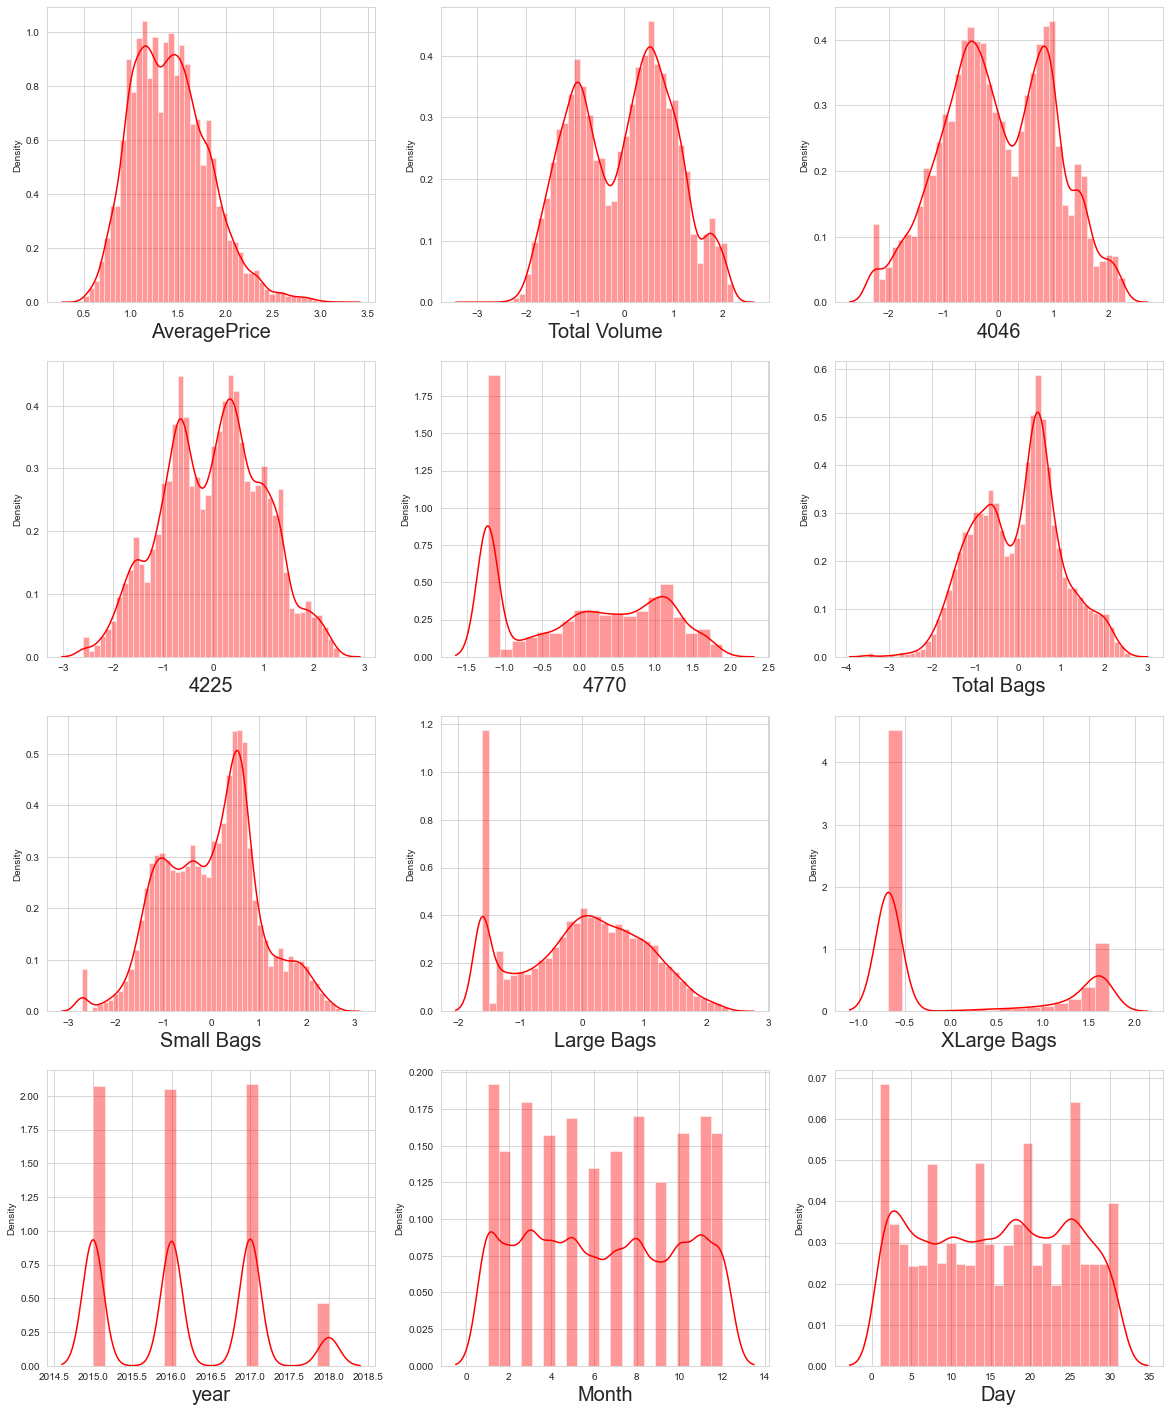

In [51]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in numerical_col:
    if plotnumber<=14:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(new_df[column],color='r')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [52]:
new_df["XLarge Bags"] = np.log1p(new_df["XLarge Bags"])
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.791499
year            0.220792
Month           0.042069
Day            -0.004650
dtype: float64

In [53]:
# let us try one more time for removal
f1=["XLarge Bags"]
new_df[f1] = sk.fit_transform(new_df[f1].values)
new_df.skew()

AveragePrice    0.560969
Total Volume   -0.006809
4046           -0.038259
4225           -0.043246
4770            0.028015
Total Bags     -0.021531
Small Bags     -0.024657
Large Bags     -0.110061
XLarge Bags     0.765164
year            0.220792
Month           0.042069
Day            -0.004650
dtype: float64

so, finally , we removed skewness from our dataset

Encoding:

In [54]:
categorical_col = ["type","region"]
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)
new_df[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


In [55]:
# Checking the correlation between features and the target
cor = new_df.corr()
cor

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
AveragePrice,1.000000,-0.576829,-0.548618,-0.448579,-0.491320,-0.564616,-0.493621,-0.477879,-0.393528,0.608447,0.099910,0.010428,0.071568,0.058266
Total Volume,-0.576829,1.000000,0.889083,0.924160,0.818568,0.939776,0.905098,0.681427,0.627310,-0.800828,0.076584,0.065709,-0.015294,-0.010471
4046,-0.548618,0.889083,1.000000,0.764679,0.736523,0.799354,0.778765,0.601899,0.573589,-0.725826,-0.002396,0.159390,-0.014000,-0.009166
4225,-0.448579,0.924160,0.764679,1.000000,0.796799,0.818511,0.784901,0.614878,0.580290,-0.747722,-0.004533,0.032273,-0.019092,-0.008019
4770,-0.491320,0.818568,0.736523,0.796799,1.000000,0.761641,0.754305,0.548457,0.615107,-0.780988,-0.051657,0.037805,-0.012151,-0.000721
Total Bags,-0.564616,0.939776,0.799354,0.818511,0.761641,1.000000,0.949901,0.729652,0.609370,-0.725686,0.210924,0.065996,-0.004350,-0.007650
Small Bags,-0.493621,0.905098,0.778765,0.784901,0.754305,0.949901,1.000000,0.566307,0.597809,-0.720466,0.185955,0.051985,-0.002533,-0.003569
Large Bags,-0.477879,0.681427,0.601899,0.614878,0.548457,0.729652,0.566307,1.000000,0.449473,-0.500026,0.190295,0.086573,-0.004320,-0.005833
XLarge Bags,-0.393528,0.627310,0.573589,0.580290,0.615107,0.609370,0.597809,0.449473,1.000000,-0.673864,0.153607,-0.015786,0.016068,0.013647
type,0.608447,-0.800828,-0.725826,-0.747722,-0.780988,-0.725686,-0.720466,-0.500026,-0.673864,1.000000,0.007399,0.021970,-0.003290,-0.003108


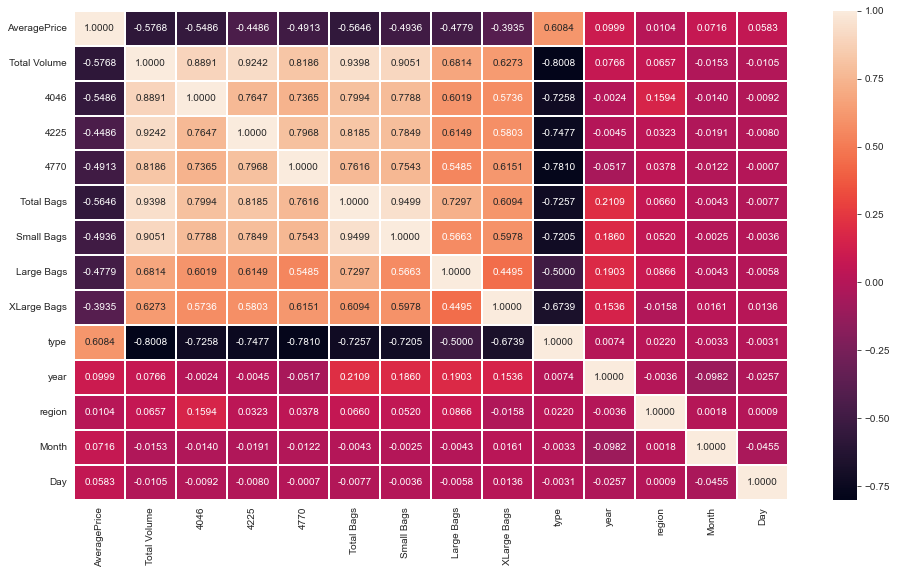

In [56]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(16,9))
sns.heatmap(new_df.corr(),linewidths=.1,fmt='0.4f', annot = True)
plt.yticks(rotation=0);

Almost all the features are highly negatively correlated with the target variable and few columns year, Month and type have positive correlation with the target.

The features Day and region have no relation with the target so we can drop these columns.

Almost all the features are correlated with each other which leads to multicollinearity problem. We will solve this problem by VIF value.

Also most of the columns have no relation with each other and have zero correlation.

In [57]:
cor['AveragePrice'].sort_values(ascending=False)

AveragePrice    1.000000
type            0.608447
year            0.099910
Month           0.071568
Day             0.058266
region          0.010428
XLarge Bags    -0.393528
4225           -0.448579
Large Bags     -0.477879
4770           -0.491320
Small Bags     -0.493621
4046           -0.548618
Total Bags     -0.564616
Total Volume   -0.576829
Name: AveragePrice, dtype: float64

Visualizing the correlation between label and features using bar plot

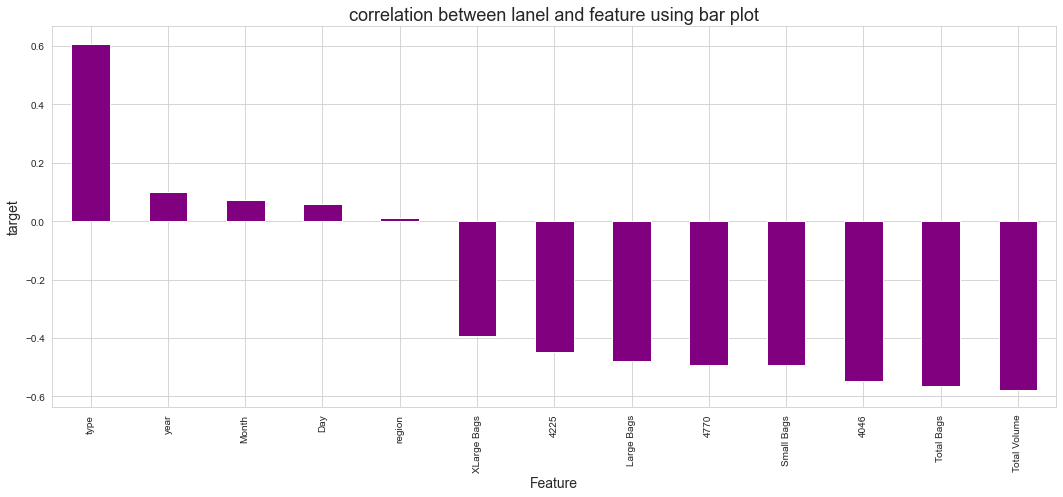

In [58]:
plt.figure(figsize=(18,7))
new_df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color='purple')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

The features region and XLarge Bags have very less correlation with the target so we can drop these columns.

In [59]:
new_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.689355,0,2015,0,12,27
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.689355,0,2015,0,12,20
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.689355,0,2015,0,12,13
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.689355,0,2015,0,6,12
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.689355,0,2015,0,11,29


In [60]:
# Saving the data for classification
class_df=new_df
class_df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-0.689355,0,2015,0,12,27
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-0.689355,0,2015,0,12,20
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-0.689355,0,2015,0,12,13
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-0.689355,0,2015,0,6,12
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-0.689355,0,2015,0,11,29


In [61]:
# Dropping irrelevant columns
new_df.drop("region",axis=1, inplace=True)
new_df.drop("XLarge Bags",axis=1, inplace=True)

In [62]:
new_df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,Month,Day
0,1.33,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,0,2015,12,27
1,1.35,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,0,2015,12,20
2,0.93,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,0,2015,12,13
3,1.08,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,0,2015,6,12
4,1.28,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,0,2015,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,1,2018,4,2
18245,1.71,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,1,2018,1,28
18246,1.87,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,1,2018,1,21
18247,1.93,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,1,2018,1,14


Separating the features and label variables into x and y:

In [63]:
x = new_df.drop("AveragePrice", axis=1)
y = new_df["AveragePrice"]

Standard Scalarization Method

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,Month,Day
0,-0.065094,-0.649918,0.358278,-0.212550,-0.527445,-0.337064,-0.775214,-1.026443,-1.214908,1.592359,1.281242
1,-0.137269,-0.770067,0.276355,-0.165117,-0.488205,-0.301038,-0.765237,-1.026443,-1.214908,1.592359,0.501783
2,0.215503,-0.724508,0.656010,0.034215,-0.556204,-0.364044,-0.752534,-1.026443,-1.214908,1.592359,-0.277677
3,0.029840,-0.625017,0.475615,-0.110976,-0.702370,-0.500341,-0.693012,-1.026443,-1.214908,-0.108942,-0.389028
4,-0.170456,-0.677083,0.268966,-0.100289,-0.675712,-0.479918,-0.600755,-1.026443,-1.214908,1.308809,1.503945
...,...,...,...,...,...,...,...,...,...,...,...
17777,-0.668931,-0.454078,-0.922232,-1.224990,-0.331042,-0.165765,-0.405895,0.974238,1.979143,-0.676043,-1.502542
17778,-0.762380,-0.610403,-0.665649,-1.224990,-0.499550,-0.321645,-0.478556,0.974238,1.979143,-1.526694,1.392594
17779,-0.766344,-0.610350,-0.774395,0.455355,-0.493424,-0.303466,-0.945246,0.974238,1.979143,-1.526694,0.613134
17780,-0.692595,-0.539211,-0.711605,0.455045,-0.424475,-0.240252,-0.910471,0.974238,1.979143,-1.526694,-0.166326


Checking VIF values for multicollinearity:

In [65]:
# Finding varience inflation factor in each scaled column i.e, x.shape[1] (1/(1-R2))

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,51.448234,Total Volume
1,6.751509,4046
2,11.107337,4225
3,3.883797,4770
4,34.361586,Total Bags
5,16.619059,Small Bags
6,3.460357,Large Bags
7,3.316151,type
8,1.297864,year
9,1.020206,Month


In [66]:
# Dropping the column Total Bags
x.drop("Total Bags",axis=1, inplace=True)

In [67]:
# Checking VIF again
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,36.640430,Total Volume
1,6.029591,4046
2,9.933019,4225
3,3.880462,4770
4,7.614352,Small Bags
5,2.099707,Large Bags
6,3.280030,type
7,1.272451,year
8,1.019275,Month
9,1.004240,Day


now VIF is less than 10 , so we move further:

In [68]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
svc=SVC()
knn=KNeighborsClassifier()

In [69]:
# Finding best random state
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor as KNN
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=i)
    mod = KNN()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.7603642251437666  on Random_state  159


In [70]:
#Creating new train test split at best randoem state
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [71]:
#Regression Algorithms
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

RANDOM FOREST REGRESSOR

In [72]:
# Checking R2 score for  Random Forest Regressor
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
pred_RFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_RFR))

# Mean Absolute Error (MAE)
print('MAE:',mean_absolute_error(y_test, pred_RFR))

# Mean Squared Error (MSE)
print('MSE:',mean_squared_error(y_test, pred_RFR))

# Root Mean Squared Error (RMSE)
print("RMSE:",np.sqrt(mean_squared_error(y_test, pred_RFR)))

# Checking cv score for Random Forest Regression
print("Cross_Validaton_Score",cross_val_score(RFR,x,y,cv=5).mean())

R2_Score: 0.830095989972987
MAE: 0.11850144329896906
MSE: 0.02917559873664479
RMSE: 0.17080866118743743
Cross_Validaton_Score 0.24960075002434107


Support Vector Machine Regressor

In [73]:
# Checking R2 score for Support Vector Machine Regressor
svr=SVR()
svr.fit(x_train,y_train)

# prediction
predsvr=svr.predict(x_test)
print('R2_Score:',r2_score(y_test,predsvr))
print('MAE:',mean_absolute_error(y_test, predsvr))
print('MSE:',mean_squared_error(y_test, predsvr))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predsvr)))

# Checking cv score for SVR 
print("Cross_Validaton_Score",cross_val_score(svr,x,y,cv=5).mean())

R2_Score: 0.7453899220816027
MAE: 0.15166411008955152
MSE: 0.04372116624246821
RMSE: 0.20909606940941813
Cross_Validaton_Score 0.21706939054897328


Linear Regression

In [74]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(x_train,y_train)

# prediction
predLR=LR.predict(x_test)
print('R2_score:',r2_score(y_test,predLR))
print('MAE:',mean_absolute_error(y_test, predLR))
print('MSE:',mean_squared_error(y_test, predLR))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predLR)))

# Checking cv score for Linear Regression
print("Cross_Validaton_Score",cross_val_score(LR,x,y,cv=5).mean())

R2_score: 0.537469294807408
MAE: 0.21739379302630987
MSE: 0.07942490736934872
RMSE: 0.2818242490797212
Cross_Validaton_Score 0.1928625266042377


Gradient Descent Regressor:

In [75]:
# Checking R2 score for Gradient Descent Regressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)

# prediction
predSGD=SGD.predict(x_test)
print('R2_Score:',r2_score(y_test,predSGD))
print('MAE:',mean_absolute_error(y_test, predSGD))
print('MSE:',mean_squared_error(y_test, predSGD))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predSGD)))

# Checking cv score for Stochastic Gradient Descent Regressor
print("Cross_Validaton_Score",cross_val_score(SGD,x,y,cv=5).mean())

R2_Score: 0.5296471304748146
MAE: 0.2196057027549539
MSE: 0.08076811479443277
RMSE: 0.28419731665593323
Cross_Validaton_Score 0.19004578808099507


In [76]:
# Checking R2 score for KNN Regressor
knn=KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn))
print('MAE:',mean_absolute_error(y_test, predknn))
print('MSE:',mean_squared_error(y_test, predknn))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predknn)))

# Checking cv score for KNN
print("Cross_Validaton_Score",cross_val_score(knn,x,y,cv=5).mean())

R2_Score: 0.7603642251437666
MAE: 0.14519400187441422
MSE: 0.04114980693533271
RMSE: 0.2028541518809332
Cross_Validaton_Score 0.13647633360061723


GradientBoosting Regressor:

In [77]:
# Checking R2 score for  GradientBoosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
GB=GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB))
print('MAE:',mean_absolute_error(y_test, predGB))
print('MSE:',mean_squared_error(y_test, predGB))
print("RMSE:",np.sqrt(mean_squared_error(y_test, predGB)))

# Checking cv score for GradientBoosting Regressor
print("Cross_Validaton_Score",cross_val_score(GB,x,y,cv=5).mean())

R2_Score: 0.7028734647162234
MAE: 0.16948505371810127
MSE: 0.05102201275926765
RMSE: 0.22588052762305041
Cross_Validaton_Score 0.3410867456525427


From the difference between R2 score and Cross Validation Score, we can conclusion that KNeighbors Regressor will be our best fitting model.

Hyperparameter Tuning:

In [78]:
from sklearn.model_selection import GridSearchCV
#KNeighbors Regressor
parameters = {'n_neighbors':[2,3,4,5,6],
              'algorithm':['auto','ball_tree', 'kd_tree', 'brute'],
              'leaf_size':[10,20,30,40,50],
              'weights':['uniform','distance']}
GCV=GridSearchCV(KNN(),parameters,cv=5)

In [79]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [2, 3, 4, 5, 6],
                         'weights': ['uniform', 'distance']})

In [80]:
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 6, 'weights': 'distance'}

In [81]:
avocado_model =KNN(algorithm='auto', leaf_size=10, n_neighbors=4, weights='distance')
avocado_model.fit(x_train, y_train)
pred = avocado_model.predict(x_test)
print("RMSE value:",np.sqrt(mean_squared_error(y_test, pred_RFR)))
print('R2_Score:',r2_score(y_test,pred)*100)

RMSE value: 0.17080866118743743
R2_Score: 76.25073349389903


In [82]:
# Saving the model using .pkl
import joblib
joblib.dump(avocado_model,"Avocado_price.pkl")

['Avocado_price.pkl']

Predicting the saved model:

In [83]:
# Let's load the saved model and get the prediction

model=joblib.load("Avocado_price.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([1.30437872, 0.93777596, 1.35128305, ..., 1.3321458 , 1.7865804 ,
       1.05479415])

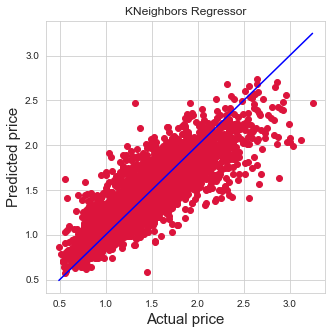

In [84]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, prediction, c='crimson')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.title("KNeighbors Regressor")
plt.xlabel('Actual price', fontsize=15)
plt.ylabel('Predicted price', fontsize=15)
plt.show()

In [85]:
a=np.array(y_test)
result=pd.DataFrame({'Original':a,'Predicted':prediction},index=range(len(a)))
result

,Original,Predicted
0,1.33,1.304379
1,0.93,0.937776
2,1.94,1.351283
3,1.01,0.980673
4,1.85,1.792578
...,...,...
5330,1.62,1.713090
5331,0.84,0.927269
5332,1.34,1.332146
5333,1.62,1.786580


# Classification Problem- Finding the Region from these data

In [86]:
# Read the dataset

df=df=pd.read_csv('Avacado',sep='\t')

df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [87]:
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [88]:
df["region"].value_counts()

Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
C

In [89]:
df.shape

(18249, 14)

In [90]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [91]:
class_df = df

Encoding the categorical columns using Label Encoding

In [92]:
categorical_col = ["type","region"]
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
class_df[categorical_col]= class_df[categorical_col].apply(LE.fit_transform)
class_df[categorical_col]

,type,region
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
18244,1,53
18245,1,53
18246,1,53
18247,1,53


In [93]:
class_df.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.000288,-0.171667,-0.000489
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281


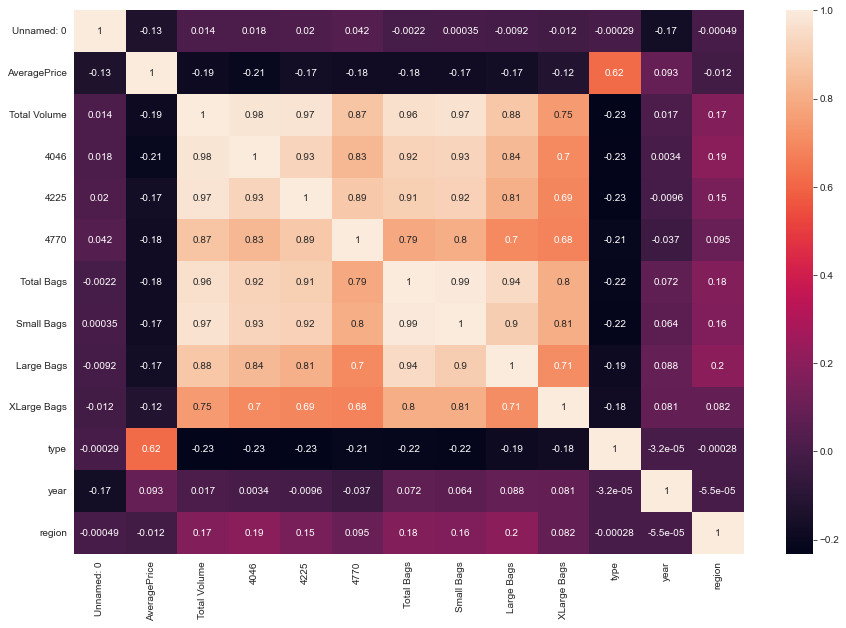

In [94]:
plt.figure(figsize=(15,10))
sns.heatmap(class_df.corr(),annot=True)
cor=class_df.corr()

In [95]:
#let us find the correlation with targetvariable
cor['region'].sort_values(ascending=False)

region          1.000000
Large Bags      0.198768
4046            0.192073
Total Bags      0.175256
Total Volume    0.174176
Small Bags      0.164702
4225            0.145726
4770            0.095252
XLarge Bags     0.082281
year           -0.000055
type           -0.000280
Unnamed: 0     -0.000489
AveragePrice   -0.011716
Name: region, dtype: float64

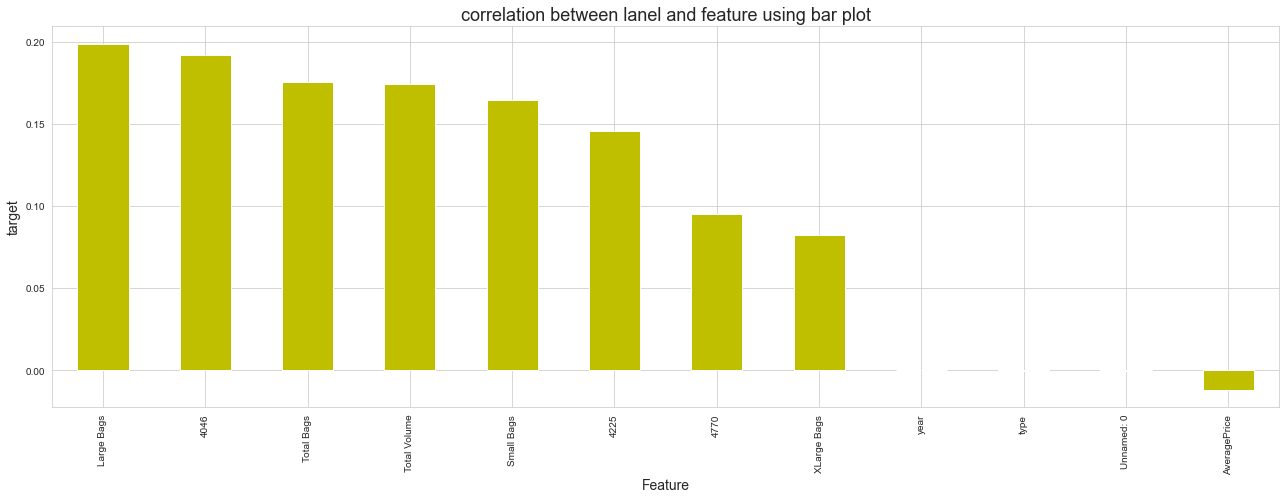

In [96]:
plt.figure(figsize=(22,7))
class_df.corr()['region'].sort_values(ascending=False).drop(['region']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

In [97]:
# Dropping irrelevant columns
class_df.drop("Date",axis=1, inplace=True)
class_df.drop("year",axis=1, inplace=True)

In [98]:
x = class_df.drop("region", axis=1)
y = class_df["region"]
x

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,7,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1
18245,8,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1
18246,9,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1
18247,10,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1


In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [100]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.036026e+00,Unnamed: 0
1,1.708597e+00,AveragePrice
2,4.919440e+09,Total Volume
3,6.600171e+08,4046
4,5.980301e+08,4225
5,4.763436e+06,4770
6,2.370316e+14,Total Bags
7,1.364727e+14,Small Bags
8,1.448103e+13,Large Bags
9,7.621400e+10,XLarge Bags


In [101]:
x.drop('Total Volume',inplace=True,axis=1)

In [102]:
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.034805e+00,Unnamed: 0
1,1.708413e+00,AveragePrice
2,1.006420e+01,4046
3,1.347443e+01,4225
4,5.378730e+00,4770
5,2.370316e+14,Total Bags
6,1.364727e+14,Small Bags
7,1.448103e+13,Large Bags
8,7.621336e+10,XLarge Bags
9,1.686748e+00,type


In [103]:
x.drop('Total Bags',axis=True,inplace=True)
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"] = x.columns

# Let's check the values
vif

,VIF values,Features
0,1.034688,Unnamed: 0
1,1.708412,AveragePrice
2,10.061400,4046
3,13.472625,4225
4,5.378704,4770
5,19.342873,Small Bags
6,5.544875,Large Bags
7,3.414144,XLarge Bags
8,1.686706,type


In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.7983561643835616  on Random_state  184


In [105]:
#spliting the data 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=161)

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [107]:
lg=LogisticRegression()
dtc=DecisionTreeClassifier()
gnb=GaussianNB()
svc=SVC()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()

In [108]:
model=[lg,dtc,gnb,svc,knn,rfc]

for i in model:
    i.fit(x_train,y_train)
    i.score(x_train,y_train)
    pred=i.predict(x_test)
    print(i)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

LogisticRegression()
0.3052054794520548
[[32  0  0 ...  0  0  0]
 [ 4 28  0 ...  0  0  0]
 [ 0  0 34 ...  0  0  0]
 ...
 [ 0  0  0 ... 98  7  0]
 [ 0  0  0 ...  1 68  0]
 [ 0  0  0 ...  0  0 20]]
              precision    recall  f1-score   support

           0       0.18      0.33      0.23        96
           1       0.50      0.25      0.34       111
           2       0.55      0.37      0.44        93
           3       0.11      0.49      0.18        90
           4       0.63      0.30      0.41       107
           5       0.40      0.22      0.28        95
           6       0.84      0.59      0.69       111
           7       0.29      0.19      0.23       116
           8       0.22      0.54      0.31       108
           9       0.29      0.46      0.35       101
          10       0.26      0.19      0.22        95
          11       0.14      0.53      0.22        87
          12       0.46      0.37      0.41       101
          13       0.52      0.23      0.32    

cross validation score:

In [109]:
model=[lg,dtc,gnb,svc,knn,rfc]

In [110]:
from sklearn.model_selection import cross_val_score
for m in model:
    score=cross_val_score(m,x,y,cv=5)
    print('score:',m)
    print(score)
    print(score.mean())

score: LogisticRegression()
[0.37452055 0.45616438 0.27013699 0.08821918 0.1000274 ]
0.25781370013176813
score: DecisionTreeClassifier()
[0.50821918 0.67150685 0.63150685 0.52712329 0.39216224]
0.5461036801225332
score: GaussianNB()
[0.54273973 0.39589041 0.21506849 0.02054795 0.017265  ]
0.2383023158906362
score: SVC()
[0.27452055 0.37671233 0.24410959 0.07013699 0.07234859]
0.20756560814184408
score: KNeighborsClassifier()
[0.25205479 0.34876712 0.21150685 0.05643836 0.07344478]
0.1884423805358571
score: RandomForestClassifier()
[0.64520548 0.82       0.76547945 0.67068493 0.48725678]
0.677725329138777


HYPERPARAMETER TUNING

In [111]:
from sklearn.model_selection import GridSearchCV
# Random forest classifier
rfc=RandomForestClassifier()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}

In [112]:
GCV=GridSearchCV(rfc,parameters,cv=5)
GCV.fit(x_train,y_train)
print(GCV.best_params_)

{'max_features': 'log2', 'n_estimators': 150}


In [113]:
region_model = RandomForestClassifier(max_features='sqrt',n_estimators=120 )
region_model.fit(x_train, y_train)
pred = region_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

90.39269406392694


By using the GridSeachCV, we are able to find the best param and then find the best accuracy score that is 90.4% using random forest classifier.

SAVE THE MODEL

In [114]:
# Saving the model using .pkl
import joblib
joblib.dump(region_model,"Avacado_region.pkl")

['Avacado_region.pkl']

PREDICTION ON SAVED MODEL

In [115]:
# Let's load the saved model and get the prediction

# Loading the saved model
model=joblib.load("Avacado_region.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([52, 53, 31, ..., 48, 47, 46])

ROC- AUC curve:

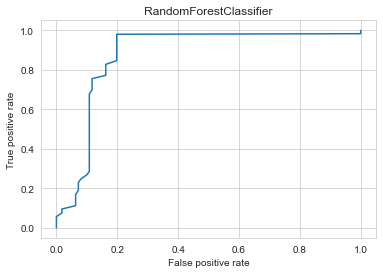

In [116]:
tpr,fpr,thresholds = roc_curve(y_test,prediction,pos_label=True)
plt.plot(fpr,tpr,label = 'RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()

As from this data set we have following conclusion:

taking price as y variable is predicting well for this model as comapared to region
also r2 score value is also greater then accuracy score

In [117]:
a=np.array(y_test)
result=pd.DataFrame({"Original":a,"Predicted":prediction})
result

,Original,Predicted
0,52,52
1,48,53
2,50,31
3,21,21
4,46,46
...,...,...
5470,0,0
5471,30,30
5472,48,48
5473,47,47


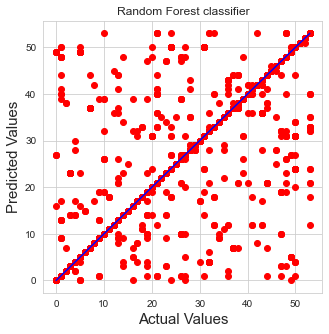

In [118]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, prediction, c='r')
plt1 = max(max(prediction), max(y_test))
plt2 = min(min(prediction), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Random Forest classifier")
plt.show()

Concluding Remarks
In addition, the score value of R2 is also greater than the accuracy score.

The average price, the total exchanges and the total volume are well distributed among all the other columns

There are no outliers in the dataset after replacing it with the mean value.

Since year is the most negatively correlated column of all columns

Between August and October the price of avocado is much higher compared to other months.

Hartford Springfield, San Francisco and New York are having more average price as compared to another region

As organic type of avocado is having the more price per unit then conventional

I had done prediction using region and price but using price the prediction score is high as compared to region

So in this data set we are using both regression and classification technique for making this model